多项式回归（Polynomial Regression）是一种回归分析方法，它通过使用多项式函数来拟合自变量和因变量之间的关系。与简单的一元或多元线性回归不同，多项式回归可以捕捉到自变量与因变量之间的非线性关系。

### 1. **模型表达式**

多项式回归的数学模型可以表示为：

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \epsilon
$$

其中：
- $ y $ 是因变量（响应变量）。
- $ x $ 是自变量（预测变量）。
- $ \beta_0, \beta_1, \dots, \beta_n $ 是回归系数，表示各个阶次的自变量对因变量的影响程度。
- $ \epsilon $ 是误差项（残差），表示模型未能解释的部分。

在这个模型中，$ x $ 的高次项（如 $ x^2, x^3 $ 等）允许模型适应自变量与因变量之间的非线性关系。

### 2. **回归系数的估计**

多项式回归的回归系数通常通过 **最小二乘法**（Ordinary Least Squares, OLS）来估计。最小二乘法的目标是最小化观测值与预测值之间的误差平方和：

$$
S(\beta_0, \beta_1, \dots, \beta_n) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \dots + \beta_n x_i^n))^2
$$

通过求解这个方程，我们可以得到回归系数 $ \beta_0, \beta_1, \dots, \beta_n $ 的估计值。这与线性回归非常相似，只不过多了额外的高次项。

### 3. **模型的选择**

多项式回归中的重要问题是选择合适的多项式阶数 $ n $（即自变量的最高次幂）。阶数过低可能无法捕捉到数据中的非线性关系，阶数过高则可能导致 **过拟合**（overfitting），即模型对训练数据拟合得太好，导致在新数据上的预测能力较差。

通常可以通过交叉验证（cross-validation）或AIC（Akaike Information Criterion）等方法来选择最佳的阶数。

### 4. **过拟合与欠拟合**

- **过拟合**：如果选择了过高的阶数，模型可能会对训练数据拟合得过于精确，甚至捕捉到数据中的噪声，这样会导致在新的数据上表现较差。过拟合通常表现为模型曲线非常复杂，能够穿过每一个数据点。
  
- **欠拟合**：如果选择的阶数过低，模型可能无法捕捉到数据中的真实模式，导致在训练数据和新数据上的预测效果都较差。欠拟合通常表现为模型曲线过于简单，无法准确表示数据的趋势。

### 5. **应用场景**

多项式回归主要应用于自变量和因变量之间存在非线性关系的情况。典型的应用场景包括：
- **经济学**：预测经济指标之间的复杂关系，如产量和价格之间的关系。
- **工程学**：建模一些物理现象，比如力学中的位移与时间的关系。
- **市场营销**：分析产品销售和广告支出之间的非线性关系。
- **医学**：在一些医学研究中，病人的某些生理指标与治疗反应之间可能存在线性或非线性关系。

### 6. **模型评估**

与线性回归类似，多项式回归的评估通常通过以下几个指标：

- **决定系数 $ R^2 $**：衡量模型的拟合优度，表示模型对数据的解释能力。多项式回归的 $ R^2 $ 可能会很高，但如果阶数过高，模型可能出现过拟合现象。
  
- **均方误差（MSE）**：表示模型的预测误差，计算方式为误差的平方和的平均值。较小的均方误差表示模型的预测精度较高。

- **交叉验证**：可以通过交叉验证来判断模型在新数据上的表现，从而选择最佳的多项式阶数。

### 7. **局限性**

- **过拟合**：高阶多项式容易导致过拟合，尤其是在数据量较小的情况下。过拟合会使模型在训练数据上表现得非常好，但在新数据上的泛化能力差。
- **计算复杂性**：随着多项式阶数的增加，计算回归系数的复杂性也会增加，这在处理大量数据时可能成为瓶颈。
- **解释性差**：高阶多项式模型可能会使回归系数的解释变得困难，因为它们可能不再代表直接的因果关系。

### 8. **总结**

多项式回归是一种强大的回归方法，适用于自变量与因变量之间存在非线性关系的情况。通过引入自变量的高次项，它能拟合复杂的数据模式。然而，选择合适的阶数对于避免过拟合或欠拟合至关重要，需要根据数据和具体问题进行调优。

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

## 数据集介绍

+ Auto MPG - https://archive.ics.uci.edu/dataset/9/auto+mpg

```shell
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed
   because they had unknown values for the "mpg" attribute.  The original
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values
```




In [44]:
df = pd.read_csv("datasets/auto+mpg/auto-mpg.data", sep=r'\t', header=None, quotechar='"', engine='python')
df = df[0].str.split(expand=True)
df = df[df[3] != '?']
df = df[df[7] == '1']
df[3] = df[3].astype(float)
df[4] = df[4].astype(float)
data = df.sort_values(by=3).to_numpy()
data

array([['29.0', '4', '85.00', ..., '22.2', '76', '1'],
       ['24.5', '4', '98.00', ..., '22.1', '76', '1'],
       ['34.7', '4', '105.0', ..., '14.9', '81', '1'],
       ...,
       ['14.0', '8', '455.0', ..., '10.0', '70', '1'],
       ['14.0', '8', '455.0', ..., '10.0', '70', '1'],
       ['16.0', '8', '400.0', ..., '9.50', '73', '1']],
      shape=(245, 8), dtype=object)

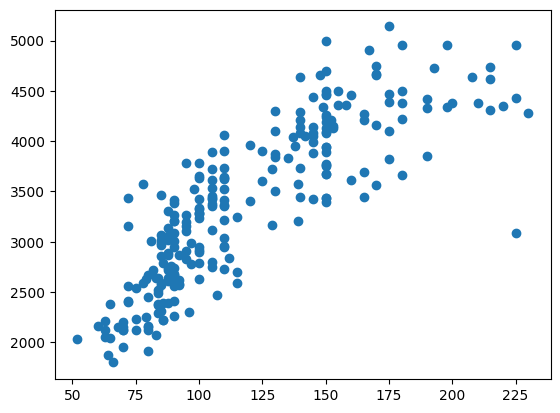

In [45]:
plt.scatter(data[:, 3], data[:, 4])
plt.show()

(245, 3)


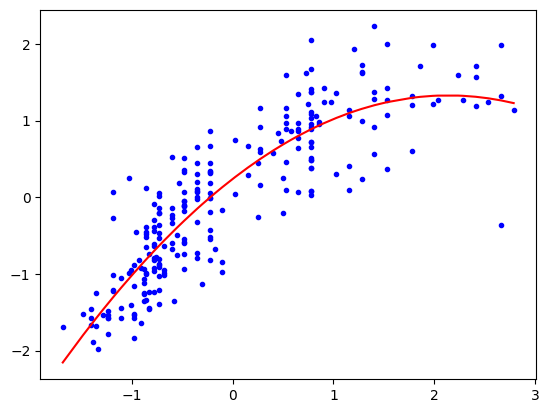

In [54]:
poly_feature = PolynomialFeatures(degree=2)
x_data = data[:, 3, np.newaxis]
y_data = data[:, 4, np.newaxis]
x_mean, x_std = np.mean(x_data), np.std(x_data)
y_mean, y_std = np.mean(y_data), np.std(y_data)
x_norm = (x_data - x_mean) / x_std
y_norm = (y_data - y_mean) / y_std
x_poly = poly_feature.fit_transform(x_norm)
print(x_poly.shape)

linear_reg = LinearRegression()
linear_reg.fit(x_poly, y_norm)

plt.plot(x_norm, y_norm, 'b.')
plt.plot(x_norm, linear_reg.predict(poly_feature.fit_transform(x_norm)), c='r')
plt.show()
